## SHUBHAM SHARMA
### IIT BOMBAY
This code is to get familiar with the dataset that we are using for volumetric segmentation. We'll go through the heart and spleen dataset here and will try to understand their shape and other features.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
# Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
# # Set numpy to print only 2 decimal digits for neatness
# np.set_printoptions(precision=2, suppress=True)

import os
import nibabel as nib
from scipy import ndimage as nd
from tqdm import tqdm

%matplotlib inline

**Let us  PROCESS the spleen data**

In [0]:
path2images='gdrive/My Drive/data_phase1/Spleen/imagesTr/'
path2labels='gdrive/My Drive/data_phase1/Spleen/labelsTr/'
list_of_images=os.listdir(path2images)
list_of_labels=os.listdir(path2labels)
print('Files in training:',list_of_images)
print('Files in testing',list_of_labels)

print(len(list_of_images))
print(len(list_of_labels))

Files in training: ['._spleen_10.nii.gz', '._spleen_13.nii.gz', '._spleen_12.nii.gz', '._spleen_14.nii.gz', '._spleen_16.nii.gz', '._spleen_17.nii.gz', '._spleen_18.nii.gz', '._spleen_20.nii.gz', '._spleen_19.nii.gz', '._spleen_2.nii.gz', '._spleen_21.nii.gz', '._spleen_24.nii.gz', '._spleen_22.nii.gz', '._spleen_26.nii.gz', '._spleen_25.nii.gz', 'spleen_10.nii.gz', '._spleen_27.nii.gz', '._spleen_32.nii.gz', '._spleen_31.nii.gz', '._spleen_29.nii.gz', '._spleen_28.nii.gz', '._spleen_3.nii.gz', '._spleen_40.nii.gz', '._spleen_33.nii.gz', '._spleen_41.nii.gz', '._spleen_38.nii.gz', '._spleen_44.nii.gz', '._spleen_45.nii.gz', '._spleen_49.nii.gz', '._spleen_47.nii.gz', '._spleen_46.nii.gz', '._spleen_52.nii.gz', '._spleen_56.nii.gz', '._spleen_6.nii.gz', '._spleen_59.nii.gz', '._spleen_53.nii.gz', '._spleen_60.nii.gz', '._spleen_9.nii.gz', '._spleen_63.nii.gz', '._spleen_61.nii.gz', '._spleen_8.nii.gz', '._spleen_62.nii.gz', 'spleen_12.nii.gz', 'spleen_13.nii.gz', 'spleen_14.nii.gz', 'sp

In [0]:
for i in range(len(list_of_images)):
  if list_of_images[i][0]!='.':
    x=list_of_images[i]
    img = nib.load(path2images+x)
    img_data = img.get_fdata()
    print('The shape of',x , ' data is',img_data.shape,'minimum is',np.min(img_data),'and maximum is',np.max(img_data))

The shape of spleen_10.nii.gz  data is (512, 512, 55) minimum is -1024.0 and maximum is 3072.0
The shape of spleen_12.nii.gz  data is (512, 512, 168) minimum is -1024.0 and maximum is 3072.0
The shape of spleen_13.nii.gz  data is (512, 512, 77) minimum is -1024.0 and maximum is 1189.0
The shape of spleen_14.nii.gz  data is (512, 512, 54) minimum is -1024.0 and maximum is 1846.0
The shape of spleen_16.nii.gz  data is (512, 512, 61) minimum is -1024.0 and maximum is 1616.0
The shape of spleen_17.nii.gz  data is (512, 512, 95) minimum is -1024.0 and maximum is 1964.0
The shape of spleen_18.nii.gz  data is (512, 512, 164) minimum is -1024.0 and maximum is 2258.0
The shape of spleen_19.nii.gz  data is (512, 512, 51) minimum is -1024.0 and maximum is 1372.0
The shape of spleen_2.nii.gz  data is (512, 512, 90) minimum is -1024.0 and maximum is 3071.0
The shape of spleen_20.nii.gz  data is (512, 512, 168) minimum is -1024.0 and maximum is 1304.0
The shape of spleen_21.nii.gz  data is (512, 512

There are 41 Training images 20 Testing images in spleen data

In [0]:
#Let us plot any of the image and its corresponding label images
epi_img = nib.load(path2images+'spleen_10.nii.gz')
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

def show_slices(slices):
# Function to display row of image slices
  fig, axes = plt.subplots(1, len(slices))
  for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")
    
slice_0 = epi_img_data[256, :, :]
slice_1 = epi_img_data[:, 256, :]
slice_2 = epi_img_data[:, :, 27]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image") 

Text(0.5, 0.98, 'Center slices for image')

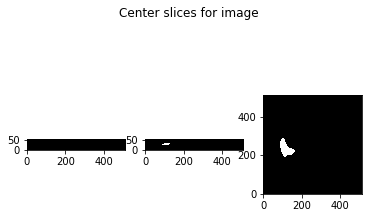

In [0]:
#Let us plot any of the image and its corresponding label images
epi_img = nib.load(path2labels+'spleen_10.nii.gz')
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

def show_slices(slices):
# Function to display row of image slices
  fig, axes = plt.subplots(1, len(slices))
  for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")
    
slice_0 = epi_img_data[256, :, :]
slice_1 = epi_img_data[:, 256, :]
slice_2 = epi_img_data[:, :, 27]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image") 

In [0]:
#Function idea taken from https://stackoverflow.com/questions/18386302/resizing-a-3d-image-and-resampling

# a = nib.load(path2images+'la_003.nii.gz') # nib is what I use to load the images
# b = (512,512,128)


def resize_image(a,b):
  '''a is the image and b is the target size eg(320,320,128)'''

  flash = a.get_data() # Access data as array (in this case memmap)

  dsfactor = [w/float(f) for w,f in zip(b, flash.shape)]
  downed = nd.interpolation.zoom(flash, zoom=dsfactor)
  return downed

In [0]:
b = (512,512,128)
c=0
for i in tqdm(range(len(list_of_images))):
  if list_of_images[i][0]!='.':
    
    l=list_of_images[i]
    img_X = nib.load(path2images+l)
    downed_X=resize_image(img_X,b)
    temp_X=np.reshape(downed_X,(1,downed_X.shape[0],downed_X.shape[1],downed_X.shape[2]))
    
    img_Y = nib.load(path2labels+l)
    downed_Y=resize_image(img_Y,b)
    temp_Y=np.reshape(downed_Y,(1,downed_Y.shape[0],downed_Y.shape[1],downed_Y.shape[2]))
    
    if c==0:
      X=temp_X
      Y=temp_Y
    else:
      X=np.concatenate((X, temp_X), axis=0)
      Y=np.concatenate((Y, temp_Y), axis=0)
    c+=1

 71%|███████   | 58/82 [10:52<15:30, 38.76s/it]/usr/local/lib/python3.6/dist-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
100%|██████████| 82/82 [26:19<00:00, 38.21s/it]


(41, 512, 512, 128)
(41, 512, 512, 128)


Text(0.5, 0.98, 'Center slices for image')

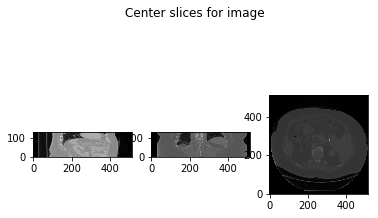

In [0]:
print(X.shape)
print(Y.shape)

downed=X[0]
#Let us check this function:
slice_0 = downed[160, :, :]
slice_1 = downed[:, 160, :]
slice_2 = downed[:, :, 60]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image") 

Text(0.5, 0.98, 'Center slices for image')

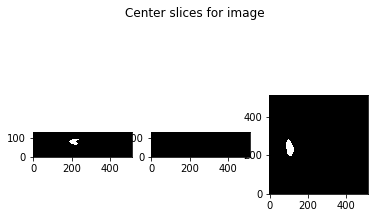

In [0]:
downed=Y[0]
#Let us check this function:
slice_0 = downed[160, :, :]
slice_1 = downed[:, 160, :]
slice_2 = downed[:, :, 60]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image") 

In [0]:
np.save('gdrive/My Drive/Phase 1 Project/X_spleen.npy',X)

np.save('gdrive/My Drive/Phase 1 Project/Y_spleen.npy',Y)


In [0]:
Y.shape

(41, 512, 512, 128)

In [0]:
#Function to create label array for binary classification
def binarylab(labels):
    
    #Define an Empty Array 
    x = np.zeros([length,width,height,classes],dtype="uint8")
    
    #Read Each pixel label and put it into corresponding label plane
    for i in range(length):
      for j in range(width):
        for k in range(height): 
          x[i,j,k,labels[i][j][k]]=1
    
    return x

In [0]:
length,width,height,classes=512,512,128,2
data_shape = length*width*height
c=0
for i in tqdm(range(Y.shape[0])):
  temp1 = binarylab(Y[i])
  temp2 = np.reshape(temp1,(1,data_shape,2))
  if c==0:
    Y_categorical=temp2
  else:
    Y_categorical=np.concatenate((Y_categorical, temp2), axis=0)
  c+=1
    

100%|██████████| 41/41 [12:46<00:00, 20.11s/it]


Text(0.5, 0.98, 'Center slices for image')

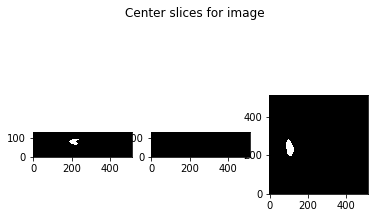

In [0]:
t=Y_categorical[0]
t=t[:,1]
t=t.reshape(length,width,height)
slice_0 = t[160, :, :]
slice_1 = t[:, 160, :]
slice_2 = t[:, :, 60]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image")

In [0]:
np.save('gdrive/My Drive/Phase 1 Project/Y_spleen_categorical.npy',Y_categorical)